In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [134]:
data = pd.read_csv("lab3_train.csv")

In [135]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [136]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that __Cabin__ column has a lot of missing values, which renders it useless for further analysis. Columns __PassengerId__, __Name__ and __Ticket__ bear no statistical value. Therefore, we can get rid of those columns. 

In [138]:
X = data.drop(["Cabin", "PassengerId", "Name", "Ticket"], axis=1)

In [139]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Now let's encode non-numeric columns and fill missing values.

In [140]:
encode_cols = ["Pclass", "Sex", "Embarked"]
X = pd.get_dummies(X, columns=encode_cols)

In [141]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
cols = ["Age"]
X[cols] = imputer.fit_transform(X[cols])

In [142]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Pclass_1    891 non-null    uint8  
 6   Pclass_2    891 non-null    uint8  
 7   Pclass_3    891 non-null    uint8  
 8   Sex_female  891 non-null    uint8  
 9   Sex_male    891 non-null    uint8  
 10  Embarked_C  891 non-null    uint8  
 11  Embarked_Q  891 non-null    uint8  
 12  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.9 KB


### Usage of K-Means method with 2 clusters

In [189]:
clusters = KMeans(n_clusters=2).fit_predict(X)
data["clusters"] = clusters

In [190]:
data["clusters"].value_counts()

0    838
1     53
Name: clusters, dtype: int64

In [191]:
data[data["clusters"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,clusters
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S,1
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S,1
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C,1
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C,1
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C,1
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C,1
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S,1
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S,1
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,1


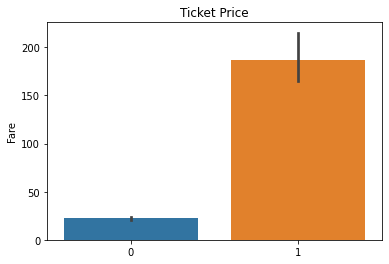

In [192]:
_ = sns.barplot(x=clusters, y=X["Fare"]).set_title('Ticket Price')

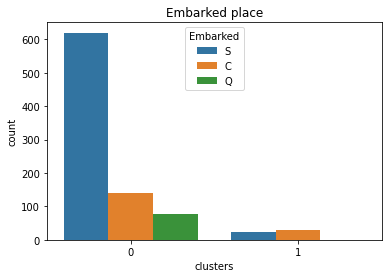

In [193]:
_ = sns.countplot(data=data, x='clusters', hue="Embarked").set_title('Embarked place')

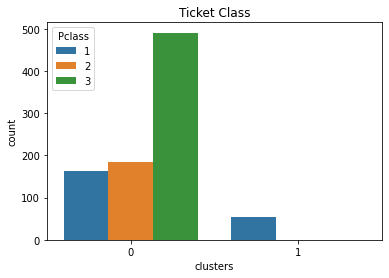

In [194]:
_ = sns.countplot(data=data, x='clusters', hue="Pclass").set_title('Ticket Class')

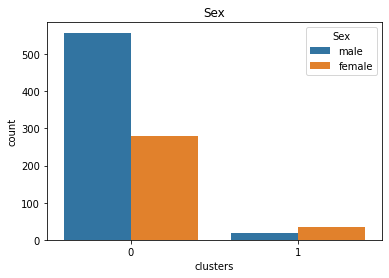

In [148]:
_ = sns.countplot(data=data, x='clusters', hue='Sex').set_title('Sex')

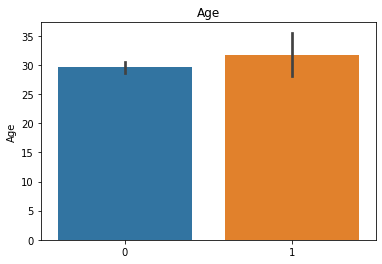

In [149]:
_ = sns.barplot(x=clusters, y=X["Age"]).set_title('Age')

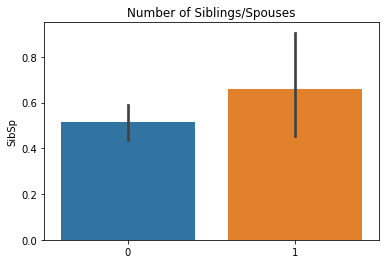

In [150]:
_ = sns.barplot(x=clusters, y=X["SibSp"]).set_title('Number of Siblings/Spouses')

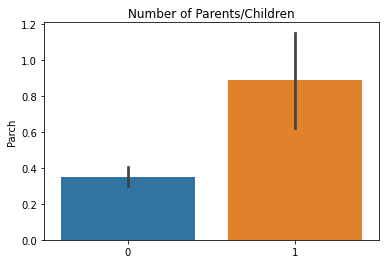

In [151]:
_ = sns.barplot(x=clusters, y=X["Parch"]).set_title('Number of Parents/Children')

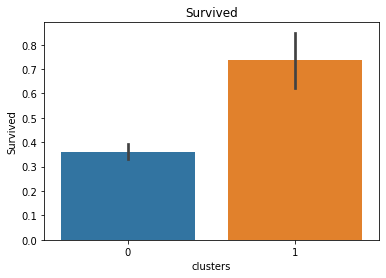

In [154]:
sns.barplot(x=data["clusters"], y=data["Survived"]).set_title('Survived');

## Conclusion (2 clasters)
### Cluster 1
1. Big size (94% of total data)
2. Most of clients embarked from Southhampton
3. Most of tickets are third class
4. Average ticket price is low (~25)
5. More men than women (~ 2 to 1)
6. Low number of family members
7. Low survival rate (~35%)

### Cluster 2
1. Small size (6% of total data)
2. People embarked only from Southhampton or Cherbourg
3. Only first class tickets
4. Average ticket price is expensive (~180)
5. More women than men
6. High number of family members
7. High survival rate (~70%)

### Summary: 
From all the information above we can get quite simple tendency: richer people (women more than men) tend to have higher survival rate. 

### Usage of K-Means method with 3 clusters

In [182]:
clusters = KMeans(n_clusters=3).fit_predict(X)
data["clusters"] = clusters

In [183]:
data["clusters"].value_counts()

0    729
2    142
1     20
Name: clusters, dtype: int64

In [184]:
data[data["clusters"] == 2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,clusters
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,2
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,2
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,2
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,2
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,2


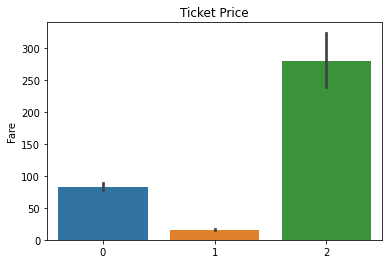

In [157]:
_ = sns.barplot(x=clusters, y=X["Fare"]).set_title('Ticket Price')

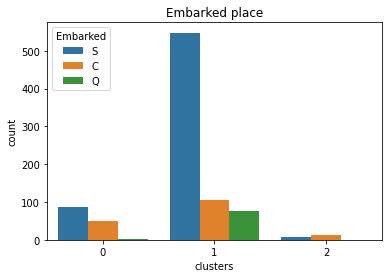

In [158]:
_ = sns.countplot(data=data, x='clusters', hue="Embarked").set_title('Embarked place')

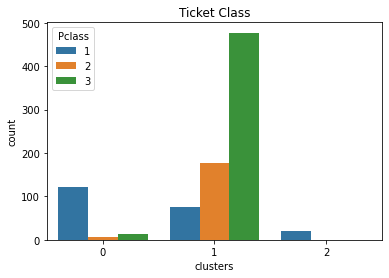

In [159]:
_ = sns.countplot(data=data, x='clusters', hue='Pclass').set_title('Ticket Class')

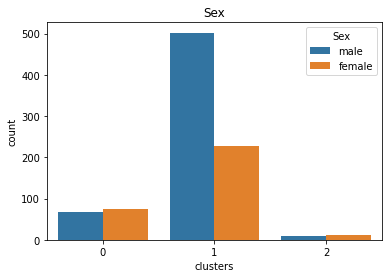

In [160]:
_ = sns.countplot(data=data, x='clusters', hue='Sex').set_title('Sex')

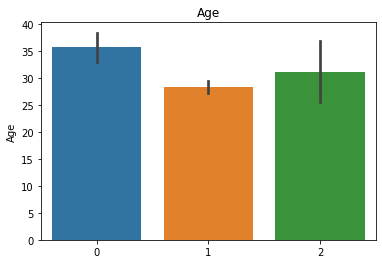

In [161]:
_ = sns.barplot(x=clusters, y=data["Age"]).set_title('Age')

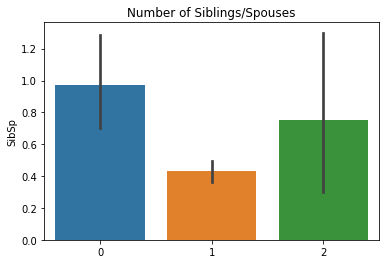

In [162]:
_ = sns.barplot(x=clusters, y=data["SibSp"]).set_title('Number of Siblings/Spouses')

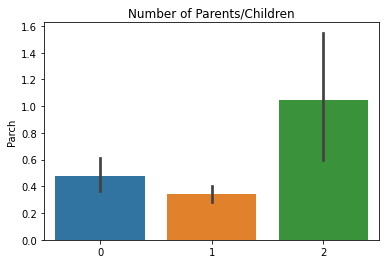

In [163]:
_ = sns.barplot(x=clusters, y=data["Parch"]).set_title('Number of Parents/Children')

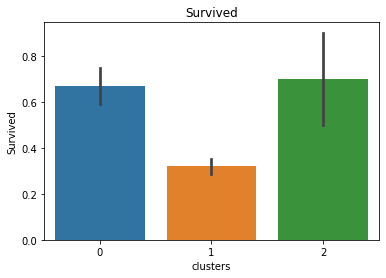

In [164]:
sns.barplot(x=data["clusters"], y=data["Survived"]).set_title('Survived');

## Conclusion (3 clasters)
### Cluster 1
1. Big size (82% of total data)
2. Most of clients embarked from Southhampton or Cherbourg
3. Most of tickets are first class
4. Average ticket price is high (~80)
5. Equal amounts of both genders
6. High number of sibilings but low number of parents/children
7. Higher than average survival rate (~65%)

### Cluster 2
1. Medium size (16% of total data)
2. Most of clients embarked from Southhampton
3. Most of tickets are third class
4. Average ticket price is low (~15)
5. More men than women (~ 2 to 1)
6. Very low number of family members
7. Low survival rate (~35%)

### Cluster 3
1. Small size (2% of total data)
2. People embarked only from Southhampton or Cherbourg
3. Only first class tickets
4. Average ticket price is very expensive (~275)
5. More women than men
6. High number of family members
7. High survival rate (~75%)

### Summary: 
We can see pretty similar tendency here as it was with 2 clusters, except now we have 3 groups of people based mostly on their wealth.

### Usage of K-Means method with 4 clusters

In [185]:
clusters = KMeans(n_clusters=4).fit_predict(X)
data["clusters"] = clusters

In [186]:
data["clusters"].value_counts()

0    725
2    135
1     28
3      3
Name: clusters, dtype: int64

In [187]:
data[data["clusters"] == 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,clusters
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3


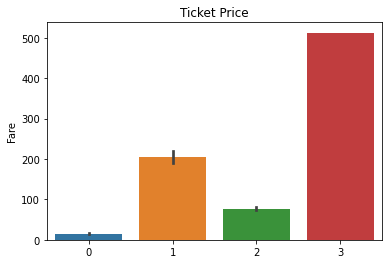

In [167]:
_ = sns.barplot(x=clusters, y=X["Fare"]).set_title('Ticket Price')

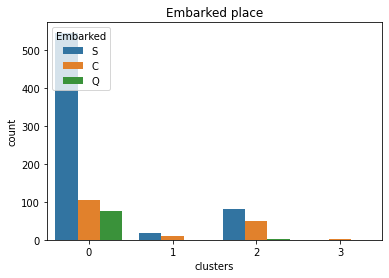

In [168]:
_ = sns.countplot(data=data, x='clusters', hue="Embarked").set_title('Embarked place')

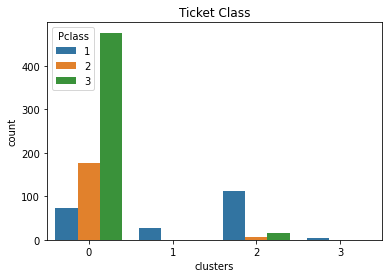

In [169]:
_ = sns.countplot(data=data, x='clusters', hue='Pclass').set_title('Ticket Class')

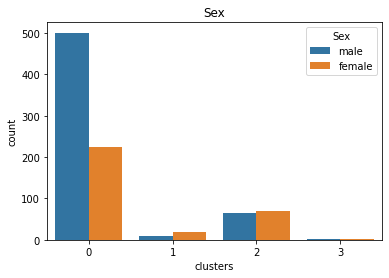

In [170]:
_ = sns.countplot(data=data, x='clusters', hue='Sex').set_title('Sex')

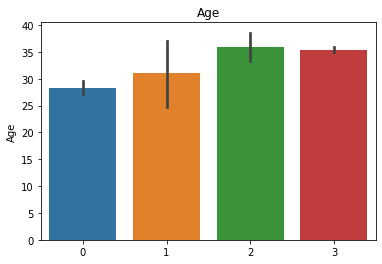

In [171]:
_ = sns.barplot(x=clusters, y=data["Age"]).set_title('Age')

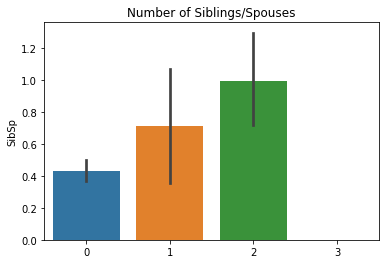

In [172]:
_ = sns.barplot(x=clusters, y=data["SibSp"]).set_title('Number of Siblings/Spouses')

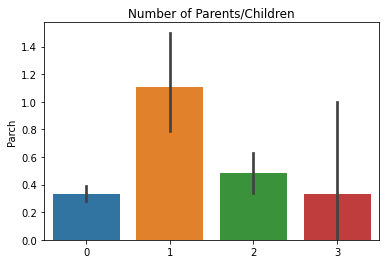

In [173]:
_ = sns.barplot(x=clusters, y=data["Parch"]).set_title('Number of Parents/Children')

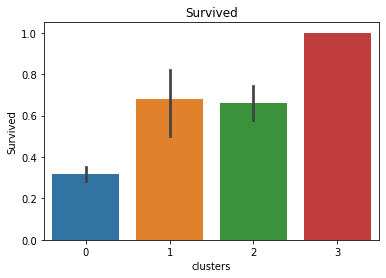

In [174]:
sns.barplot(x=data["clusters"], y=data["Survived"]).set_title('Survived');

## Conclusion (4 clasters)
### Cluster 1
1. Big size (81% of total data)
2. Most of clients embarked from Southhampton
3. Most of tickets are third class
4. Average ticket price is low (~20)
5. More men than women (~ 2 to 1)
6. Very low number of family members
7. Low survival rate (~30%)

### Cluster 2
1. Medium size (15% of total data)
2. Clients embarked only from Southhampton or Cherbourg
3. Only first class tickets
4. Average ticket price is expensive (~200)
5. More women than men
6. High number of family members (Mostly parents/children)
7. Higher than average survival rate (~70%)

### Cluster 3
1. Small size (3% of total data)
2. Clients embarked mostly from Southhampton or Cherbourg
3. Most of tickets are first class
4. Average ticket price is high (~70)
5. Equal amounts of both genders
6. High number of family members (Mostly sibilings)
7. High survival rate (~65%)

### Cluster 4
1. Very small size (3 people)
2. People embarked from Southhampton
3. Only first class tickets
4. All 3 people have same ticket PC 17755 for 512
5. Two males one woman
6. Only parents/children
7. Absolute survival rate (100%)

### Summary: 
We can see pretty similar tendency here as it was with 3 clusters, except now we there is a cluster of 3 exceptional people who paid the most. 

# General Conclusion:
### Basically, all implementations had very similar result. In my opinion, most optimal amount of clusters for this task is 3.